Matriz Vandermonde: 
[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [4.09600000e+03 2.04800000e+03 1.02400000e+03 5.12000000e+02
  2.56000000e+02 1.28000000e+02 6.40000000e+01 3.20000000e+01
  1.60000000e+01 8.00000000e+00 4.00000000e+00 2.00000000e+00
  1.00000000e+00]
 [5.31441000e+05 1.77147000e+05 5.90490000e+04 1.96830000e+04
  6.56100000e+03 2.18700000e+03 7.29000000e+02 2.43000000e+02
  8.10000000e+01 2.70000000e+01 9.00000000e+00 3.00000000e+00
  1.00000000e+00]
 [1.67772160e+07 4.19430400e+06 1.04857600e+06 2.62144000e+05
  6.55360000e+04 1.63840000e+04 4.09600000e+03 1.02400000e+03
  2.56000000e+02 6.40000000e+01 1.60000000e+01 4.00000000e+00
  1.00000000e+00]
 [2.44140625e+08 4.88281250e+07 9.76562500e+06 1.95312500e+06
  3.90625000e+05 7.81250000e+04 1.56250000e+04 3.12500000e+03
  6.25000000e+02 1.25000000e+02 2.50000

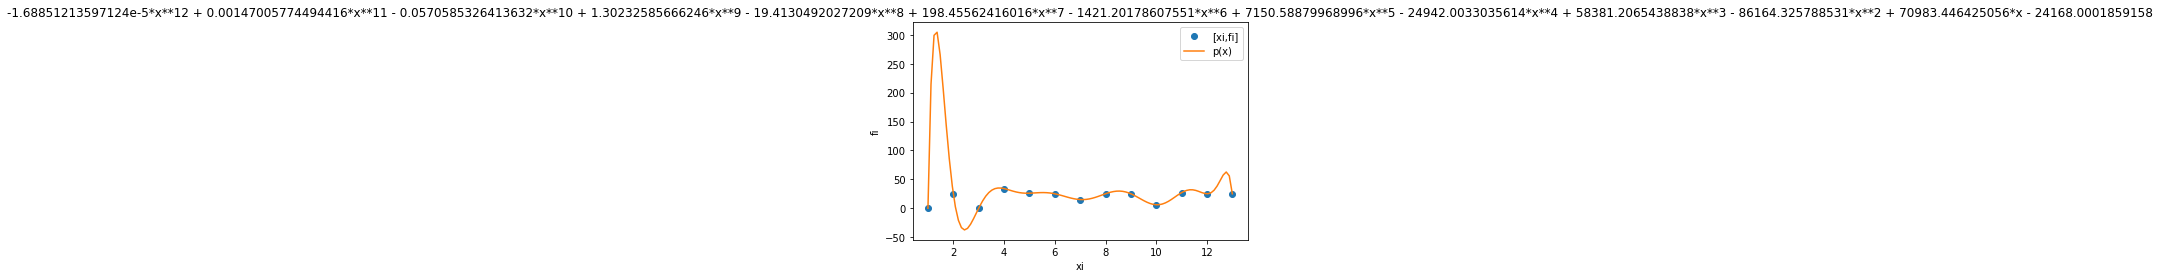

In [1]:
# El polinomio de interpolación
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# INGRESO

xi = [1,2,3,4,5,6,7,8,9,10,11,12,13]
fi = [0,25,0,34,26,25,15,25,25,6,27,25,25]
# muestras = tramos+1
muestras = 101

# PROCEDIMIENTO
# Convierte a arreglos numpy 
xi = np.array(xi)
B = np.array(fi)
n = len(xi)

# Matriz Vandermonde D
D = np.zeros(shape=(n,n),dtype =float)
for i in range(0,n,1):
    for j in range(0,n,1):
        potencia = (n-1)-j # Derecha a izquierda
        D[i,j] = xi[i]**potencia

# Aplicar métodos Unidad03. Tarea
# Resuelve sistema de ecuaciones A.X=B
coeficiente = np.linalg.solve(D,B)

# Polinomio en forma simbólica
x = sym.Symbol('x')
polinomio = 0
for i in range(0,n,1):
    potencia = (n-1)-i   # Derecha a izquierda
    termino = coeficiente[i]*(x**potencia)
    polinomio = polinomio + termino

# Polinomio a forma Lambda
# para evaluación con vectores de datos xin
px = sym.lambdify(x,polinomio)

# Para graficar el polinomio en [a,b]
a = np.min(xi)
b = np.max(xi)
xin = np.linspace(a,b,muestras)
yin = px(xin)

# Usando evaluación simbólica
##yin = np.zeros(muestras,dtype=float)
##for j in range(0,muestras,1):
##    yin[j] = polinomio.subs(x,xin[j])
    
# SALIDA
print('Matriz Vandermonde: ')
print(D)
print('los coeficientes del polinomio: ')
print(coeficiente)
print('Polinomio de interpolación: ')
print(polinomio)
print('\n formato pprint')
sym.pprint(polinomio)

# Grafica
plt.plot(xi,fi,'o', label='[xi,fi]')
plt.plot(xin,yin, label='p(x)')
plt.xlabel('xi')
plt.ylabel('fi')
plt.legend()
plt.title(polinomio)
plt.show()